# Quantum Coin Toss

<p>A basic and experimental introduction to quantum computing. This program serves to simulate a fair coin toss by utilizing the quantum superposition of a single qubit in order to determine a random result with 50% probability of each outcome.</p>

<p>This is a python program and makes use of the Qiskit library in order to execute quantum operations. Using Qiskit we are able to run the quantum operations on both simulated hardware, as well as real hardware available within the IBM Quantum platform.</p>

<p>This program can be run on the cloud via IBM Quantum Lab. It can also be run locally by installing Python and Qiskit. To run locally you will need an IBM Quantum account. <a href="https://qiskit.org/documentation/getting_started.html">Click here for a more detailed guide.</a></p>

In [5]:
from qiskit import *
from qiskit.providers.aer import QasmSimulator

playerChoice = 0 # Heads
#playerChoice = 1 # Tails

backend = QasmSimulator()

# Setup quantum circuit.
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure([0], [0])
compiledCircuit = transpile(circuit, backend)

# Execute circuit.
job = backend.run(compiledCircuit, shots=1)

# Process results.
result = job.result()
counts = result.get_counts(compiledCircuit)

# Print result.
if '0' in counts.keys():
    # Measurement is heads.
    if playerChoice == 0: print("Heads. You win.")
    else: print ("Heads. You lose.")

else:
    # Measurement is tails.
    if playerChoice == 0: print ("Tails. You lose.")
    else: print ("Tails. You win.")
 

Heads. You win.


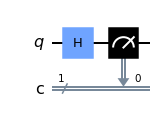

In [67]:
# Draw circuit
circuit.draw()

In [69]:
# Show backends available
for b in Aer.backends():
    print(b)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [71]:
# Access real hardware
from qiskit import IBMQ
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-29 21:23:05,201: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [72]:
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

In [74]:
for backend in provider.backends():
    print(backend.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 2, 'status_msg': 'active'}
{'backend_name': 'ibmq_armonk', 'backend_version': '2.4.26', 'operational': True, 'pending_jobs': 1, 'status_msg': 'active'}
{'backend_name': 'ibmq_santiago', 'backend_version': '1.3.43', 'operational': False, 'pending_jobs': 2034, 'status_msg': 'maintenance'}
{'backend_name': 'ibmq_bogota', 'backend_version': '1.6.17', 'operational': True, 'pending_jobs': 374, 'status_msg': 'active'}
{'backend_name': 'ibmq_lima', 'backend_version': '1.0.27', 'operational': True, 'pending_jobs': 416, 'status_msg': 'active'}
{'backend_name': 'ibmq_belem', 'backend_version': '1.0.30', 'operational': True, 'pending_jobs': 468, 'status_msg': 'internal'}
{'backend_name': 'ibmq_quito', 'backend_version': '1.1.20', 'operational': True, 'pending_jobs': 475, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pendi

In [77]:
real_device = provider.get_backend('ibmq_bogota')
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [78]:
from qiskit.test.mock import FakeAthens
athens = FakeAthens()

In [79]:
# Run from real device

job = real_device.run(transpile(circuit, real_device), shots=1)
result = job.result()
result

Result(backend_name='ibmq_bogota', backend_version='1.6.17', qobj_id='fe74f988-1cfb-44cd-8e7e-f9ff4a24a910', job_id='61f5b2b1806f5506557f4b48', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.7853981633974483, memory_slots=1, metadata={}, n_qubits=5, name='circuit-571', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-29 22:00:24+00:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_bogota', backend_version='1.6.17'), execution_id='d8b3847c-814e-11ec-b3e0-b02628eaa3aa', time_taken=6.230922222137451, error=None, client_version={'qiskit': '0.34.1'})